# **NAME : Affan Zulfiqar**
---
# **REG ID : B22F0144AI050**
---
# **Course : ANN Lab (09)**
---
# **Section : AI22F-Blue**

## **Task:**
* Use dataset CIFAR-10: A dataset containing 60,000 images (10 classes: airplanes, cars, birds, cats, etc.).
* Use different variations of ResNet Architecture.
* Compare the perfomance of these architecture on same dataset.

**Import Libraries**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
from torchvision import models

**Load Data**

This function loads the CIFAR-10 dataset, applies data augmentation and normalization, and selects only 2000 samples for training and testing. It then creates data loaders to efficiently feed batches of images to the model during training and evaluation.

In [ ]:
def get_dataloaders(batch_size=10):
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainset.data = trainset.data[:2000]
    trainset.targets = trainset.targets[:2000]
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testset.data = testset.data[:2000]
    testset.targets = testset.targets[:2000]
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    return trainloader, testloader

**Train and evaluate Model**

This function trains a given model using the training dataset, optimizing it with the Adam optimizer and cross-entropy loss. After training, it evaluates the model’s accuracy on the test dataset.

In [1]:
def train_and_evaluate(model, trainloader, testloader, epochs=10, lr=0.001, device='cuda'):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.to(device)

    # Training loop
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}')

    # Evaluation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy

# Load data
trainloader, testloader = get_dataloaders()

100%|██████████| 170M/170M [00:03<00:00, 53.8MB/s]


**Models:**

In [ ]:
# Define models
resnet_variants = {
    "ResNet18": models.resnet18,
    "ResNet34": models.resnet34,
    "ResNet50": models.resnet50
}

device = 'cuda' if torch.cuda.is_available() else 'cpu'

**Training and Evaluate each Model**

This code defines different ResNet architectures (ResNet18, ResNet34, ResNet50) for comparison. It also sets the computing device to GPU (cuda) if available; otherwise, it defaults to CPU.

In [2]:
results = {}
for name, model_fn in resnet_variants.items():
    print(f"Training {name}...")
    model = model_fn(weights=None)
    model.fc = nn.Linear(model.fc.in_features, 10)
    start_time = time.time()
    accuracy = train_and_evaluate(model, trainloader, testloader, epochs=10, device=device)
    end_time = time.time()
    results[name] = {'Accuracy': accuracy, 'Training Time': end_time - start_time}

Training ResNet18...
Epoch 1, Loss: 2.2733
Epoch 2, Loss: 2.0577
Epoch 3, Loss: 2.0145
Epoch 4, Loss: 1.9270
Epoch 5, Loss: 1.8724
Epoch 6, Loss: 1.8354
Epoch 7, Loss: 1.8353
Epoch 8, Loss: 1.7888
Epoch 9, Loss: 1.7362
Epoch 10, Loss: 1.7041
Accuracy: 37.70%
Training ResNet34...
Epoch 1, Loss: 2.3972
Epoch 2, Loss: 2.1613
Epoch 3, Loss: 2.1977
Epoch 4, Loss: 2.1138
Epoch 5, Loss: 2.1412
Epoch 6, Loss: 2.1747
Epoch 7, Loss: 2.1874
Epoch 8, Loss: 2.2292
Epoch 9, Loss: 2.1786
Epoch 10, Loss: 2.1358
Accuracy: 19.75%
Training ResNet50...
Epoch 1, Loss: 2.9045
Epoch 2, Loss: 2.8731
Epoch 3, Loss: 2.6420
Epoch 4, Loss: 2.4839
Epoch 5, Loss: 2.5514
Epoch 6, Loss: 2.5406
Epoch 7, Loss: 2.3491
Epoch 8, Loss: 2.3722
Epoch 9, Loss: 2.2937
Epoch 10, Loss: 2.2358
Accuracy: 26.55%


**Performance**

In [3]:
print("\nFinal Results:")
for name, result in results.items():
    print(f"{name}: Accuracy = {result['Accuracy']}%, Time = {result['Training Time']:.2f} sec")


Final Results:
ResNet18: Accuracy = 37.7%, Time = 614.36 sec
ResNet34: Accuracy = 19.75%, Time = 1169.14 sec
ResNet50: Accuracy = 26.55%, Time = 1271.81 sec


**Analysis:**

ResNet18 performs the best (37.7%) among the three models, achieving the highest accuracy while also having the lowest training time (614.36 sec).

ResNet34 performs the worst (19.75%) despite having more layers, suggesting overfitting or insufficient data for deeper networks.

ResNet50 (26.55%) is better than ResNet34 but worse than ResNet18, showing that deeper architectures require more data to outperform shallower ones.

Training time increases significantly with depth, with ResNet50 taking over twice the time of ResNet18, but without a significant accuracy improvement.

**Plot Accuracy Comparison**

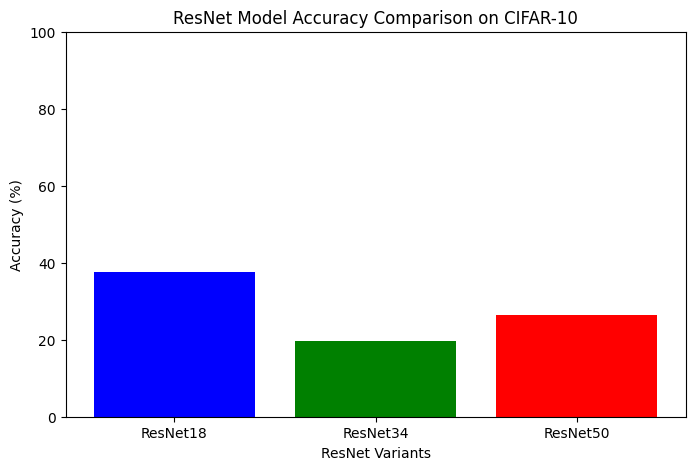

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
names = list(results.keys())
accuracies = [results[name]['Accuracy'] for name in names]
plt.bar(names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('ResNet Variants')
plt.ylabel('Accuracy (%)')
plt.title('ResNet Model Accuracy Comparison on CIFAR-10')
plt.ylim(0, 100)
plt.show()